In [1]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker
import matplotlib.colors

mp.rcParams.update({'mathtext.default': 'regular'})
% matplotlib inline

In [2]:
def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (numpy.abs(dd_array - dd)).argmin()
   return geo_idx

In [3]:
year_start = 402 #time_subsets[chunk,0]
year_end = 2200 #time_subsets[chunk,1]

# create season strings
years = numpy.arange(year_start, year_end+1, 1).astype(numpy.int)
half_years = numpy.arange(year_start+0.75, year_end, 1)
season_strings = numpy.empty(years.size-1, dtype=numpy.str)

season_strings = [str(years[i])+'-'+str(years[i+1]) for i in range(years.size-1)]
member_strings = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons=year_end-year_start

In [4]:
LA_lat = 34.0522
LA_lon = 118.2437 # deg west
LA_lon = 180. + (180-LA_lon)

OD_lat = 39.5380
OD_lon = 121.4831 # deg west
OD_lon = 360 - OD_lon

SF_lat = 37.7749
SF_lon = 122.4194
SF_lon = 360 - SF_lon

In [5]:
#working_dir = '/ninod/baird/cmip5/cmip5_calculations/attribution_2017/storm_counting/'
#ca_latlon_indices_array = numpy.load(working_dir + 'ca_latlon_indices_array.npy')
#print(ca_latlon_indices_array)

working_dir = '/ninod/baird/cmip5/cmip5_calculations/attribution_2017/storm_counting/'
ca_latlon_regional_indices_array = numpy.load(working_dir + 'ca_latlon_regional_indices_array.npy')
#print(ca_latlon_regional_indices_array)

ca_latlon_array = numpy.load(working_dir + 'ca_latlon_array.npy')

print(ca_latlon_array.shape)

(65, 2)


In [6]:
lat_unique = numpy.unique(ca_latlon_array[:,0])
lon_unique = numpy.unique(ca_latlon_array[:,1])

LA_model_lat = lat_unique[geo_idx(LA_lat, lat_unique)]
LA_model_lon = lon_unique[geo_idx(LA_lon, lon_unique)]

SF_model_lat = lat_unique[geo_idx(SF_lat, lat_unique)]
SF_model_lon = lon_unique[geo_idx(SF_lon, lon_unique)]

OD_model_lat = lat_unique[geo_idx(OD_lat, lat_unique)]
OD_model_lon = lon_unique[geo_idx(OD_lon, lon_unique)]

In [7]:
working_dir = '/ninod/baird/cmip5/cmip5_calculations/attribution_2017/storm_counting/'
threshold=0.1
#threshold=0.5
#threshold=1.0
#threshold=5.0
#threshold=10.0

#for i in range(ca_latlon_regional_indices_array.shape[0]):
#    #print(lat_idx, lon_idx)
#    file_name = 'member_005_latidx_'+'{:02d}'.format(lat_idx)+'_lonidx_'+'{:02d}'.format(lon_idx)+'_years_'+'{:04d}'.format(year_start)+'-'+'{:04d}'.format(year_end)+'_threshold_'+str(threshold)+'mmday.npy'
#    dict_pic = numpy.load(working_dir + file_name).item()
#dict_data = numpy.load(working_dir + 'storm_counting_decadal_chunks_'+start_year+'-'+end_year+'_threshold_'+threshold+'mmday.npy').item()

In [8]:
# now find where these locations are in the full array
OD_latlon_idx = numpy.where( (OD_model_lat==ca_latlon_array[:,0])&(OD_model_lon==ca_latlon_array[:,1]) )[0]
SF_latlon_idx = numpy.where( (SF_model_lat==ca_latlon_array[:,0])&(SF_model_lon==ca_latlon_array[:,1]) )[0]
LA_latlon_idx = numpy.where( (LA_model_lat==ca_latlon_array[:,0])&(LA_model_lon==ca_latlon_array[:,1]) )[0]

In [9]:
filename_OD = 'member_005_latidx_'+'{:02d}'.format(ca_latlon_regional_indices_array[OD_latlon_idx,0][0])+'_lonidx_'+'{:02d}'.format(ca_latlon_regional_indices_array[OD_latlon_idx,1][0])+'_years_'+'{:04d}'.format(year_start)+'-'+'{:04d}'.format(year_end)+'_threshold_'+str(threshold)+'mmday.npy'
filename_SF = 'member_005_latidx_'+'{:02d}'.format(ca_latlon_regional_indices_array[SF_latlon_idx,0][0])+'_lonidx_'+'{:02d}'.format(ca_latlon_regional_indices_array[SF_latlon_idx,1][0])+'_years_'+'{:04d}'.format(year_start)+'-'+'{:04d}'.format(year_end)+'_threshold_'+str(threshold)+'mmday.npy'
filename_LA = 'member_005_latidx_'+'{:02d}'.format(ca_latlon_regional_indices_array[LA_latlon_idx,0][0])+'_lonidx_'+'{:02d}'.format(ca_latlon_regional_indices_array[LA_latlon_idx,1][0])+'_years_'+'{:04d}'.format(year_start)+'-'+'{:04d}'.format(year_end)+'_threshold_'+str(threshold)+'mmday.npy'


dict_OD = numpy.load(working_dir + filename_OD).item()
dict_SF = numpy.load(working_dir + filename_SF).item()
dict_LA = numpy.load(working_dir + filename_LA).item()

In [10]:
#print(dict_LA['402-403'].keys())
#dict_keys(['storm_count', 'precipitation_days', 'seasonal_total', 'storm_length_list', 'storm_magnitude_list'])

### Open accumulation data and plot as histogram

In [12]:
# histogram of accumulation distribution
accumulation_array = [dict_LA[s]['storm_magnitude_list'] for s in season_strings]
accumulation_array = numpy.array([item for sublist in accumulation_array for item in sublist])

bins = numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram, bin_edges = numpy.histogram(accumulation_array, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

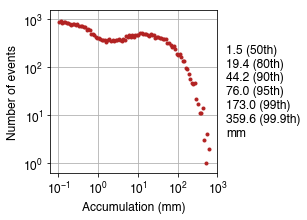

In [13]:
fig = mp.figure(figsize=(3,3))
fontsize=12

ax = fig.add_subplot(111)
#ax.bar(bin_centers, histogram, align='center', width=bin_width, color='0.5', edgecolor='0.25', label='historical')
ax.scatter(bin_centers, histogram, color='firebrick', label='historical', marker='.')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Number of events', fontsize=fontsize)
ax.set_xlabel('Accumulation (mm)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.2,10**3.2)
ax.set_xticks([10**-1,10**0,10**1,10**2,10**3])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

#ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

#ax_right = ax.twinx()
#ax_min, ax_max = ax.get_ylim()
#ax_right.set_yticks([1,2,3,4,5,10])
#ax_right.tick_params(labelsize=fontsize)
#ax_right.set_ylim(numpy.log(ax_min), numpy.log(ax_max))

perc50 = numpy.percentile(accumulation_array, 50)
perc75 = numpy.percentile(accumulation_array, 75)
perc80 = numpy.percentile(accumulation_array, 80)
perc90 = numpy.percentile(accumulation_array, 90)
perc95 = numpy.percentile(accumulation_array, 95)
perc99 = numpy.percentile(accumulation_array, 99)
perc999 = numpy.percentile(accumulation_array, 99.9)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm'

ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)


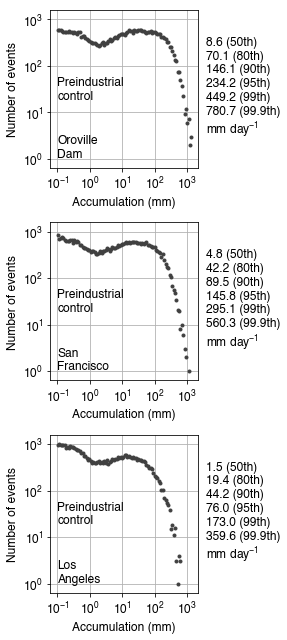

In [14]:
fig = mp.figure(figsize=(3,9))
fontsize=12


# OROVILLE

accumulation_array = [dict_OD[s]['storm_magnitude_list'] for s in season_strings]
accumulation_array = numpy.array([item for sublist in accumulation_array for item in sublist])
bins = numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram, bin_edges = numpy.histogram(accumulation_array, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax = fig.add_subplot(311)
#ax.bar(bin_centers, histogram, align='center', width=bin_width, color='0.5', edgecolor='0.25', label='historical')
ax.scatter(bin_centers, histogram, color='0.25', label='historical', marker='.')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Number of events', fontsize=fontsize)
ax.set_xlabel('Accumulation (mm)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.2,10**3.2)
ax.set_xticks([10**-1,10**0,10**1,10**2,10**3])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc50 = numpy.percentile(accumulation_array, 50)
perc75 = numpy.percentile(accumulation_array, 75)
perc80 = numpy.percentile(accumulation_array, 80)
perc90 = numpy.percentile(accumulation_array, 90)
perc95 = numpy.percentile(accumulation_array, 95)
perc99 = numpy.percentile(accumulation_array, 99)
perc999 = numpy.percentile(accumulation_array, 99.9)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm day$^{-1}$'
ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s='Oroville\nDam', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
ax.text(s='Preindustrial\ncontrol', y=0.5, x=0.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)


# San Francisco

accumulation_array = [dict_SF[s]['storm_magnitude_list'] for s in season_strings]
accumulation_array = numpy.array([item for sublist in accumulation_array for item in sublist])
#bins = numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram, bin_edges = numpy.histogram(accumulation_array, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax = fig.add_subplot(312)

ax.scatter(bin_centers, histogram, color='0.25', label='historical', marker='.')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Number of events', fontsize=fontsize)
ax.set_xlabel('Accumulation (mm)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.2,10**3.2)
ax.set_xticks([10**-1,10**0,10**1,10**2,10**3])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc50 = numpy.percentile(accumulation_array, 50)
perc75 = numpy.percentile(accumulation_array, 75)
perc80 = numpy.percentile(accumulation_array, 80)
perc90 = numpy.percentile(accumulation_array, 90)
perc95 = numpy.percentile(accumulation_array, 95)
perc99 = numpy.percentile(accumulation_array, 99)
perc999 = numpy.percentile(accumulation_array, 99.9)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm day$^{-1}$'
ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s='San\nFrancisco', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
ax.text(s='Preindustrial\ncontrol', y=0.5, x=0.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)



# Los Angeles

accumulation_array = [dict_LA[s]['storm_magnitude_list'] for s in season_strings]
accumulation_array = numpy.array([item for sublist in accumulation_array for item in sublist])
#bins = numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram, bin_edges = numpy.histogram(accumulation_array, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax = fig.add_subplot(313)

ax.scatter(bin_centers, histogram, color='0.25', label='historical', marker='.')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Number of events', fontsize=fontsize)
ax.set_xlabel('Accumulation (mm)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.2,10**3.2)
ax.set_xticks([10**-1,10**0,10**1,10**2,10**3])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc50 = numpy.percentile(accumulation_array, 50)
perc75 = numpy.percentile(accumulation_array, 75)
perc80 = numpy.percentile(accumulation_array, 80)
perc90 = numpy.percentile(accumulation_array, 90)
perc95 = numpy.percentile(accumulation_array, 95)
perc99 = numpy.percentile(accumulation_array, 99)
perc999 = numpy.percentile(accumulation_array, 99.9)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm day$^{-1}$'
ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s='Los\nAngeles', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
ax.text(s='Preindustrial\ncontrol', y=0.5, x=0.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)

mp.tight_layout()#h_pad=1.5)

#mp.savefig('./figs/histogram_loglog_hist_rcp85_'+str(year_start)+'-'+str(year_end)+'_threshold_'+'{:.1f}'.format(threshold)+'mmday_3plot.pdf', transparent=True, bbox_inches='tight')

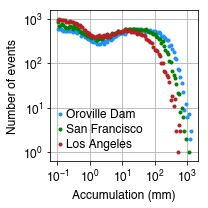

In [15]:
fig = mp.figure(figsize=(3,3))
fontsize=12


# OROVILLE

accumulation_array = [dict_OD[s]['storm_magnitude_list'] for s in season_strings]
accumulation_array = numpy.array([item for sublist in accumulation_array for item in sublist])
bins = numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram, bin_edges = numpy.histogram(accumulation_array, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax = fig.add_subplot(111)
#ax.bar(bin_centers, histogram, align='center', width=bin_width, color='0.5', edgecolor='0.25', label='historical')
ax.scatter(bin_centers, histogram, color='dodgerblue', label='Oroville Dam', marker='.')

perc50 = numpy.percentile(accumulation_array, 50)
perc75 = numpy.percentile(accumulation_array, 75)
perc80 = numpy.percentile(accumulation_array, 80)
perc90 = numpy.percentile(accumulation_array, 90)
perc95 = numpy.percentile(accumulation_array, 95)
perc99 = numpy.percentile(accumulation_array, 99)
perc999 = numpy.percentile(accumulation_array, 99.9)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm day$^{-1}$'
#ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
#ax.text(s='Oroville\nDam', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
#ax.text(s='Preindustrial\ncontrol', y=0.5, x=0.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)


# San Francisco

accumulation_array = [dict_SF[s]['storm_magnitude_list'] for s in season_strings]
accumulation_array = numpy.array([item for sublist in accumulation_array for item in sublist])
#bins = numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram, bin_edges = numpy.histogram(accumulation_array, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax.scatter(bin_centers, histogram, color='green', label='San Francisco', marker='.')

perc50 = numpy.percentile(accumulation_array, 50)
perc75 = numpy.percentile(accumulation_array, 75)
perc80 = numpy.percentile(accumulation_array, 80)
perc90 = numpy.percentile(accumulation_array, 90)
perc95 = numpy.percentile(accumulation_array, 95)
perc99 = numpy.percentile(accumulation_array, 99)
perc999 = numpy.percentile(accumulation_array, 99.9)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm day$^{-1}$'
#ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
#ax.text(s='San\nFrancisco', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
#ax.text(s='Preindustrial\ncontrol', y=0.5, x=0.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)



# Los Angeles

accumulation_array = [dict_LA[s]['storm_magnitude_list'] for s in season_strings]
accumulation_array = numpy.array([item for sublist in accumulation_array for item in sublist])
#bins = numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram, bin_edges = numpy.histogram(accumulation_array, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax.scatter(bin_centers, histogram, color='firebrick', label='Los Angeles', marker='.')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Number of events', fontsize=fontsize)
ax.set_xlabel('Accumulation (mm)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.2,10**3.2)
ax.set_xticks([10**-1,10**0,10**1,10**2,10**3])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.05,0.05), \
          bbox_transform=ax.transAxes, loc='lower left', borderaxespad=0, labelspacing=0.25, \
          fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          handletextpad=0.5, markerscale=1, handlelength=0)

mp.tight_layout()#h_pad=1.5)



#mp.savefig('./figs/histogram_loglog_hist_rcp85_'+str(year_start)+'-'+str(year_end)+'_threshold_'+'{:.1f}'.format(threshold)+'mmday_3plot.pdf', transparent=True, bbox_inches='tight')

# Open precipitation days data and plot as histogram

In [16]:
# histogram of accumulation distribution
precipitation_days = [dict_LA[s]['precipitation_days'] for s in season_strings]
precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])

#bins = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
bins = numpy.linspace(threshold,precipitation_days.max(),100) # linearly spaced bins
histogram, bin_edges = numpy.histogram(precipitation_days, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

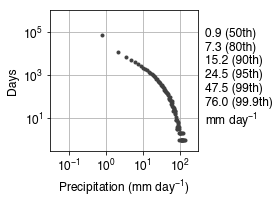

In [18]:
fig = mp.figure(figsize=(3,3))
fontsize=12

ax = fig.add_subplot(111)
#ax.bar(bin_centers, histogram, align='center', width=bin_width, color='0.5', edgecolor='0.25', label='historical')
ax.scatter(bin_centers, histogram, color='0.25', label='historical', marker='.')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{-1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

#ax.set_ylim(0.5,30000)
ax.set_ylim(10**-0.5,10**6)
#ax.set_xticks([10**-0.5,10**0,10**1,10**2])
ax.set_xlim(10**-1.5, 10**2.5)

ax.minorticks_off()
ax.set_axisbelow(True)

#ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
#ax.set_xticks([0,25,50,75,100,125,150])

#ax_right = ax.twinx()
#ax_min, ax_max = ax.get_ylim()
#ax_right.set_yticks([1,2,3,4,5,10])
#ax_right.tick_params(labelsize=fontsize)
#ax_right.set_ylim(numpy.log(ax_min), numpy.log(ax_max))

perc50 = numpy.percentile(precipitation_days, 50)
perc75 = numpy.percentile(precipitation_days, 75)
perc80 = numpy.percentile(precipitation_days, 80)
perc90 = numpy.percentile(precipitation_days, 90)
perc95 = numpy.percentile(precipitation_days, 95)
perc99 = numpy.percentile(precipitation_days, 99)
perc999 = numpy.percentile(precipitation_days, 99.9)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm day$^{-1}$'

ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.grid()

fig.tight_layout()

#mp.savefig('single_realization_preindustrial.pdf', transparent=True, bbox_inches='tight')

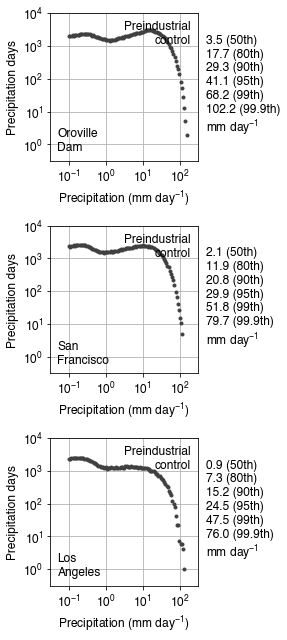

In [23]:
fig = mp.figure(figsize=(3,9))
fontsize=12


# OROVILLE

# histogram of accumulation distribution
precipitation_days = [dict_OD[s]['precipitation_days'] for s in season_strings]
precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])
bins = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,precipitation_days.max(),100) # linearly spaced bins
histogram, bin_edges = numpy.histogram(precipitation_days, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax = fig.add_subplot(311)
#ax.bar(bin_centers, hist_histogram, align='center', width=bin_width, color='0.5', edgecolor='0.25', label='historical')
ax.scatter(bin_centers, histogram, color='0.25', label='historical', marker='.')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Precipitation days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{-1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.5,10**4)
ax.set_xlim(10**-1.5, 10**2.5)
ax.set_yticks([10**0,10**1,10**2,10**3,10**4])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc50 = numpy.percentile(precipitation_days, 50)
perc75 = numpy.percentile(precipitation_days, 75)
perc80 = numpy.percentile(precipitation_days, 80)
perc90 = numpy.percentile(precipitation_days, 90)
perc95 = numpy.percentile(precipitation_days, 95)
perc99 = numpy.percentile(precipitation_days, 99)
perc999 = numpy.percentile(precipitation_days, 99.9)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm day$^{-1}$'
ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s='Oroville\nDam', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
ax.text(s='Preindustrial\ncontrol', y=0.95, x=0.95, transform=ax.transAxes, ha='right', va='top', fontsize=fontsize)






# San Francisco

# histogram of accumulation distribution
precipitation_days = [dict_SF[s]['precipitation_days'] for s in season_strings]
precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])
bins = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,precipitation_days.max(),100) # linearly spaced bins
histogram, bin_edges = numpy.histogram(precipitation_days, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]
ax = fig.add_subplot(312)

ax.scatter(bin_centers, histogram, color='0.25', label='historical', marker='.')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Precipitation days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{-1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.5,10**4)
ax.set_xlim(10**-1.5, 10**2.5)
ax.set_yticks([10**0,10**1,10**2,10**3,10**4])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc50 = numpy.percentile(precipitation_days, 50)
perc75 = numpy.percentile(precipitation_days, 75)
perc80 = numpy.percentile(precipitation_days, 80)
perc90 = numpy.percentile(precipitation_days, 90)
perc95 = numpy.percentile(precipitation_days, 95)
perc99 = numpy.percentile(precipitation_days, 99)
perc999 = numpy.percentile(precipitation_days, 99.9)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm day$^{-1}$'
ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s='San\nFrancisco', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
ax.text(s='Preindustrial\ncontrol', y=0.95, x=0.95, transform=ax.transAxes, ha='right', va='top', fontsize=fontsize)

# Los Angeles

# histogram of accumulation distribution
precipitation_days = [dict_LA[s]['precipitation_days'] for s in season_strings]
precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])
bins = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,precipitation_days.max(),100) # linearly spaced bins
histogram, bin_edges = numpy.histogram(precipitation_days, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax = fig.add_subplot(313)

ax.scatter(bin_centers, histogram, color='0.25', label='historical', marker='.')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Precipitation days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{-1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.5,10**4)
ax.set_xlim(10**-1.5, 10**2.5)
ax.set_yticks([10**0,10**1,10**2,10**3,10**4])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc50 = numpy.percentile(precipitation_days, 50)
perc75 = numpy.percentile(precipitation_days, 75)
perc80 = numpy.percentile(precipitation_days, 80)
perc90 = numpy.percentile(precipitation_days, 90)
perc95 = numpy.percentile(precipitation_days, 95)
perc99 = numpy.percentile(precipitation_days, 99)
perc999 = numpy.percentile(precipitation_days, 99.9)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm day$^{-1}$'
ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s='Los\nAngeles', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
ax.text(s='Preindustrial\ncontrol', y=0.95, x=0.95, transform=ax.transAxes, ha='right', va='top', fontsize=fontsize)

mp.tight_layout()#h_pad=1.5)

mp.savefig('./figs/histogram_loglog_preindustrial_threshold_'+'{:.1f}'.format(threshold)+'mmday_3plot.pdf', transparent=True, bbox_inches='tight')

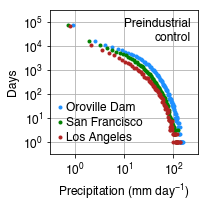

In [18]:
fig = mp.figure(figsize=(3,3))
fontsize=12
ax = fig.add_subplot(111)

# OROVILLE

precipitation_days = [dict_OD[s]['precipitation_days'] for s in season_strings]
precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])
#bins = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
bins = numpy.linspace(threshold,precipitation_days.max(),100) # linearly spaced bins
histogram, bin_edges = numpy.histogram(precipitation_days, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax.scatter(bin_centers, histogram, marker='.', color='dodgerblue', label='Oroville Dam')

# San Francisco

# histogram of accumulation distribution
precipitation_days = [dict_SF[s]['precipitation_days'] for s in season_strings]
precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])
#bins = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
bins = numpy.linspace(threshold,precipitation_days.max(),100) # linearly spaced bins
histogram, bin_edges = numpy.histogram(precipitation_days, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax.scatter(bin_centers, histogram, marker='.', color='green', label='San Francisco')

# Los Angeles

precipitation_days = [dict_LA[s]['precipitation_days'] for s in season_strings]
precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])
#bins = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
bins = numpy.linspace(threshold,precipitation_days.max(),100) # linearly spaced bins
histogram, bin_edges = numpy.histogram(precipitation_days, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax.scatter(bin_centers, histogram, marker='.', color='firebrick', label='Los Angeles')

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{-1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.5,10**5.5)
ax.set_xlim(10**-0.5, 10**2.5)
ax.set_yticks([10**0,10**1,10**2,10**3,10**4,10**5])

ax.minorticks_off()
ax.grid()
ax.set_axisbelow(True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.05,0.05), \
          bbox_transform=ax.transAxes, loc='lower left', borderaxespad=0, labelspacing=0.25, \
          fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          handletextpad=0.5, markerscale=1, handlelength=0)

ax.text(s='Preindustrial\ncontrol', y=0.95, x=0.95, transform=ax.transAxes, ha='right', va='top', fontsize=fontsize)
mp.tight_layout()

mp.savefig('./figs/histogram_loglog_preindustrial_threshold_'+'{:.1f}'.format(threshold)+'mmday_1plot.pdf', transparent=True, bbox_inches='tight')

# Open seasonal accumulation and plot as histogram

In [19]:
print(dict_LA['402-403'].keys())

dict_keys(['precipitation_days', 'storm_count', 'seasonal_total', 'storm_magnitude_list', 'storm_length_list'])


In [20]:
# histogram of accumulation distribution
seasonal_totals = numpy.array([dict_LA[s]['seasonal_total'] for s in season_strings])
#seasonal_totals = numpy.array([item for sublist in seasonal_totals for item in sublist])
bins = numpy.logspace(numpy.log10(seasonal_totals.min()),numpy.log10(seasonal_totals.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram, bin_edges = numpy.histogram(accumulation_array, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

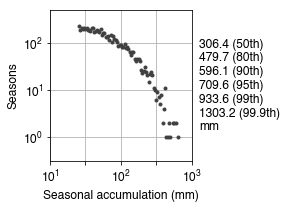

In [21]:
fig = mp.figure(figsize=(3,3))
fontsize=12

ax = fig.add_subplot(111)
#ax.bar(bin_centers, histogram, align='center', width=bin_width, color='0.5', edgecolor='0.25', label='historical')
ax.scatter(bin_centers, histogram, color='0.25', label='historical', marker='.')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Seasons', fontsize=fontsize)
ax.set_xlabel('Seasonal accumulation (mm)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

#ax.set_ylim(0.5,30000)
ax.set_ylim(10**-0.5,10**2.7)
ax.set_xticks([10**1,10**1.5,10**2,10**2.5,10**3])
ax.set_xlim(10**1, 10**3)

ax.minorticks_off()
ax.set_axisbelow(True)

perc50 = numpy.percentile(seasonal_totals, 50)
perc75 = numpy.percentile(seasonal_totals, 75)
perc80 = numpy.percentile(seasonal_totals, 80)
perc90 = numpy.percentile(seasonal_totals, 90)
perc95 = numpy.percentile(seasonal_totals, 95)
perc99 = numpy.percentile(seasonal_totals, 99)
perc999 = numpy.percentile(seasonal_totals, 99.9)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm'

#divider = axes_grid1.make_axes_locatable(ax)
#ax_text = divider.append_axes('right', pad=0.05, size='15%')
#ax_text.text(s=perc_text, y=1.0, x=0.0, transform=ax_text.transAxes, ha='left', va='top', fontsize=fontsize)

ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)

#import make_axes_locatable
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.05)

ax.grid()
ax.set_axisbelow(True)
fig.tight_layout()

#mp.savefig('single_realization_preindustrial.pdf', transparent=True, bbox_inches='tight')

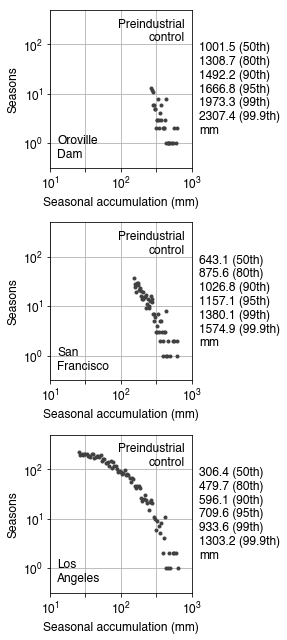

In [22]:
fig = mp.figure(figsize=(3,9))
fontsize=12


# OROVILLE
seasonal_totals = numpy.array([dict_OD[s]['seasonal_total'] for s in season_strings])
#bins = numpy.linspace(seasonal_totals.min(),seasonal_totals.max(),100) # log spaced bins
bins = numpy.logspace(numpy.log10(seasonal_totals.min()),numpy.log10(seasonal_totals.max()),100) # log spaced bins
histogram, bin_edges = numpy.histogram(accumulation_array, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax = fig.add_subplot(311)
#ax.bar(bin_centers, hist_histogram, align='center', width=bin_width, color='0.5', edgecolor='0.25', label='historical')
ax.scatter(bin_centers, histogram, color='0.25', label='historical', marker='.')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Seasons', fontsize=fontsize)
ax.set_xlabel('Seasonal accumulation (mm)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.5,10**2.7)
ax.set_xticks([10**1,10**1.5,10**2,10**2.5,10**3])
ax.set_xlim(10**1, 10**3)

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc50 = numpy.percentile(seasonal_totals, 50)
perc75 = numpy.percentile(seasonal_totals, 75)
perc80 = numpy.percentile(seasonal_totals, 80)
perc90 = numpy.percentile(seasonal_totals, 90)
perc95 = numpy.percentile(seasonal_totals, 95)
perc99 = numpy.percentile(seasonal_totals, 99)
perc999 = numpy.percentile(seasonal_totals, 99.9)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm'
ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s='Oroville\nDam', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
ax.text(s='Preindustrial\ncontrol', y=0.95, x=0.95, transform=ax.transAxes, ha='right', va='top', fontsize=fontsize)






# San Francisco
seasonal_totals = numpy.array([dict_SF[s]['seasonal_total'] for s in season_strings])
bins = numpy.logspace(numpy.log10(seasonal_totals.min()),numpy.log10(seasonal_totals.max()),100) # log spaced bins
histogram, bin_edges = numpy.histogram(accumulation_array, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax = fig.add_subplot(312)

ax.scatter(bin_centers, histogram, color='0.25', label='historical', marker='.')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Seasons', fontsize=fontsize)
ax.set_xlabel('Seasonal accumulation (mm)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.5,10**2.7)
ax.set_xticks([10**1,10**1.5,10**2,10**2.5,10**3])
ax.set_xlim(10**1, 10**3)

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc50 = numpy.percentile(seasonal_totals, 50)
perc75 = numpy.percentile(seasonal_totals, 75)
perc80 = numpy.percentile(seasonal_totals, 80)
perc90 = numpy.percentile(seasonal_totals, 90)
perc95 = numpy.percentile(seasonal_totals, 95)
perc99 = numpy.percentile(seasonal_totals, 99)
perc999 = numpy.percentile(seasonal_totals, 99.9)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm'
ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s='San\nFrancisco', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
ax.text(s='Preindustrial\ncontrol', y=0.95, x=0.95, transform=ax.transAxes, ha='right', va='top', fontsize=fontsize)

# Los Angeles
seasonal_totals = numpy.array([dict_LA[s]['seasonal_total'] for s in season_strings])
bins = numpy.logspace(numpy.log10(seasonal_totals.min()),numpy.log10(seasonal_totals.max()),100) # log spaced bins
histogram, bin_edges = numpy.histogram(accumulation_array, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax = fig.add_subplot(313)

ax.scatter(bin_centers, histogram, color='0.25', label='historical', marker='.')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Seasons', fontsize=fontsize)
ax.set_xlabel('Seasonal accumulation (mm)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.5,10**2.7)
ax.set_xticks([10**1,10**1.5,10**2,10**2.5,10**3])
ax.set_xlim(10**1, 10**3)

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc50 = numpy.percentile(seasonal_totals, 50)
perc75 = numpy.percentile(seasonal_totals, 75)
perc80 = numpy.percentile(seasonal_totals, 80)
perc90 = numpy.percentile(seasonal_totals, 90)
perc95 = numpy.percentile(seasonal_totals, 95)
perc99 = numpy.percentile(seasonal_totals, 99)
perc999 = numpy.percentile(seasonal_totals, 99.9)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm'
ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s='Los\nAngeles', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
ax.text(s='Preindustrial\ncontrol', y=0.95, x=0.95, transform=ax.transAxes, ha='right', va='top', fontsize=fontsize)

mp.tight_layout()#h_pad=1.5)

mp.savefig('./figs/histogram_loglog_preindustrial_threshold_'+'{:.1f}'.format(threshold)+'mmday_3plot.pdf', transparent=True, bbox_inches='tight')

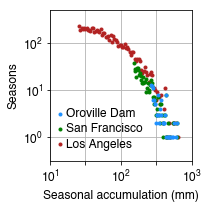

In [23]:
fig = mp.figure(figsize=(3,3))
fontsize=12

ax = fig.add_subplot(111)

# OROVILLE
seasonal_totals = numpy.array([dict_OD[s]['seasonal_total'] for s in season_strings])
#bins = numpy.linspace(seasonal_totals.min(),seasonal_totals.max(),100) # log spaced bins
bins = numpy.logspace(numpy.log10(seasonal_totals.min()),numpy.log10(seasonal_totals.max()),100) # log spaced bins
histogram, bin_edges = numpy.histogram(accumulation_array, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax.scatter(bin_centers, histogram, color='dodgerblue', label='Oroville Dam', marker='.', zorder=3)

# SAN FRANCISCO
seasonal_totals = numpy.array([dict_SF[s]['seasonal_total'] for s in season_strings])
bins = numpy.logspace(numpy.log10(seasonal_totals.min()),numpy.log10(seasonal_totals.max()),100) # log spaced bins
histogram, bin_edges = numpy.histogram(accumulation_array, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax.scatter(bin_centers, histogram, color='green', label='San Francisco', marker='.', zorder=2)

# LOS ANGELES
seasonal_totals = numpy.array([dict_LA[s]['seasonal_total'] for s in season_strings])
bins = numpy.logspace(numpy.log10(seasonal_totals.min()),numpy.log10(seasonal_totals.max()),100) # log spaced bins
histogram, bin_edges = numpy.histogram(accumulation_array, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax.scatter(bin_centers, histogram, color='firebrick', label='Los Angeles', marker='.', zorder=1)

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Seasons', fontsize=fontsize)
ax.set_xlabel('Seasonal accumulation (mm)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.5,10**2.7)
ax.set_xticks([10**1,10**1.5,10**2,10**2.5,10**3])
ax.set_xlim(10**1, 10**3)

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.05,0.05), \
          bbox_transform=ax.transAxes, loc='lower left', borderaxespad=0, labelspacing=0.25, \
          fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          handletextpad=0.5, markerscale=1, handlelength=0)

mp.tight_layout()#h_pad=1.5)

#mp.savefig('./figs/histogram_loglog_preindustrial_threshold_'+'{:.1f}'.format(threshold)+'mmday_3plot.pdf', transparent=True, bbox_inches='tight')

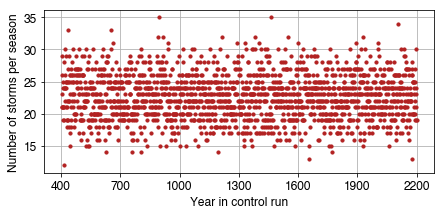

In [24]:
storm_counts = [dict_LA[s]['storm_count'] for s in season_strings]

fontsize=12
fig = mp.figure(figsize=(7,3))
ax = fig.add_subplot(111)
ax.scatter(half_years, storm_counts, c='firebrick', s=10)

ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Year in control run', fontsize=fontsize)
ax.set_ylabel('Number of storms per season', fontsize=fontsize)
ax.set_xticks(numpy.arange(400,2201,300))#[400,500,750,1000,1250,1500,1750,2000,2200])
ax.grid()
ax.set_axisbelow(True)

fig.savefig('figs/number_of_storms_threshold_'+str(threshold)+'mmday_LosAngeles_picontrol.pdf', transparent=True, bbox_inches='tight')

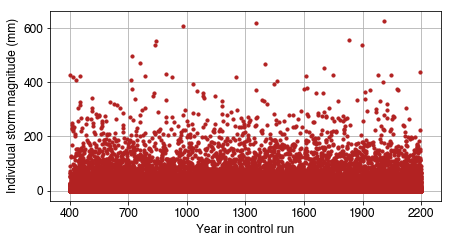

In [25]:
# storm magnitudes

fontsize=12
fig = mp.figure(figsize=(7,3.5))
ax = fig.add_subplot(111)

for s in range(n_seasons):
    yvals = dict_LA[season_strings[s]]['storm_magnitude_list']
    xvals = [half_years[s]]*len(yvals)
    ax.scatter(xvals, yvals, c='firebrick', s=10)

ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Year in control run', fontsize=fontsize)
ax.set_ylabel('Individual storm magnitude (mm)', fontsize=fontsize)
ax.set_xticks(numpy.arange(400,2201,300))#[400,500,750,1000,1250,1500,1750,2000,2200])
#ax.set_yticks([0,250,500,750,1000,1250,1500])
ax.set_xlim(300,2300)

ax.grid()
ax.set_axisbelow(True)

fig.savefig('figs/storm_magnitude_threshold_'+str(threshold)+'mmday_LosAngeles_picontrol.pdf', transparent=True, bbox_inches='tight')

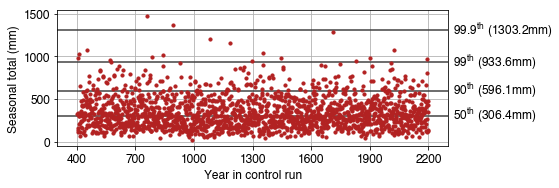

In [26]:
fontsize=12
fig = mp.figure(figsize=(7,2.5))
ax = fig.add_subplot(111)

seasonal_totals = [dict_LA[s]['seasonal_total'] for s in season_strings]

ax.scatter(half_years, seasonal_totals, c='firebrick', s=10, zorder=2)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Year in control run', fontsize=fontsize)
ax.set_ylabel('Seasonal total (mm)', fontsize=fontsize)
ax.set_xticks(numpy.arange(400,2201,300))#[400,500,750,1000,1250,1500,1750,2000,2200])
#ax.set_yticks([0,250,500,750,1000,1250,1500])
ax.set_xlim(300,2300)
#ax.set_ylim(-100,1200)

perc50 = numpy.percentile(seasonal_totals, 50)
perc90 = numpy.percentile(seasonal_totals, 90)
perc99 = numpy.percentile(seasonal_totals, 99)
perc999 = numpy.percentile(seasonal_totals, 99.9)

ax.axhline(perc50, zorder=1, label='50th perc.', c='0.25')
ax.axhline(perc90, zorder=1, label='90th perc.', c='0.25')
ax.axhline(perc99, zorder=1, label='99th perc.', c='0.25')
ax.axhline(perc999, zorder=1, label='99.9th perc.', c='0.25')

ax.text(s='50$^{th}$ ('+'{:.1f}'.format(perc50)+'mm)', x=2325, y=perc50, ha='left', va='center', fontsize=fontsize)
ax.text(s='90$^{th}$ ('+'{:.1f}'.format(perc90)+'mm)', x=2325, y=perc90, ha='left', va='center', fontsize=fontsize)
ax.text(s='99$^{th}$ ('+'{:.1f}'.format(perc99)+'mm)', x=2325, y=perc99, ha='left', va='center', fontsize=fontsize)
ax.text(s='99.9$^{th}$ ('+'{:.1f}'.format(perc999)+'mm)', x=2325, y=perc999, ha='left', va='center', fontsize=fontsize)

ax.grid()
ax.set_axisbelow(True)

fig.savefig('figs/seasonal_total_threshold_'+str(threshold)+'mmday_LosAngeles_picontrol.pdf', transparent=True, bbox_inches='tight')

In [27]:
# histogram of storm sizes (both individual and seasonal totals!)

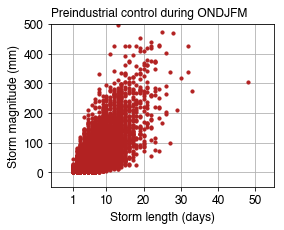

In [28]:
# storm magnitude versus storm length in days

#seasonal_total = numpy.sum(seas_PRECT[seas_PRECT>threshold])
#save_dict[season_strings[s]] = {'storm_count' : storm_count}
#save_dict[season_strings[s]]['storm_magnitude_list'] = storm_magnitude_list
#save_dict[season_strings[s]]['storm_length_list'] = storm_length_list
#save_dict[season_strings[s]]['seasonal_total'] = seasonal_total

# need to sum values for each season
all_magnitudes = [dict_LA[s]['storm_magnitude_list'] for s in season_strings]
all_magnitudes_flatten = numpy.array([item for sublist in all_magnitudes for item in sublist])

all_lengths = [dict_LA[s]['storm_length_list'] for s in season_strings]
all_lengths_flatten = numpy.array([item for sublist in all_lengths for item in sublist])
#print(len(all_magnitudes))
numpy.percentile(all_magnitudes_flatten, 99.9)

fontsize=12
fig = mp.figure(figsize=(4,3))
ax = fig.add_subplot(111)

ax.scatter(all_lengths_flatten, all_magnitudes_flatten, s=10, c='firebrick')

ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Storm length (days)', fontsize=fontsize)
ax.set_ylabel('Storm magnitude (mm)', fontsize=fontsize)
ax.set_xlim(-5,55)
ax.set_ylim(-50,500)
ax.set_xticks([1,10,20,30,40,50])
ax.grid()
ax.set_axisbelow(True)

ax.text(s='Preindustrial control during ONDJFM', x=0, y=1.05, transform=ax.transAxes, fontsize=fontsize)

fig.savefig('figs/storm_magnitude_versus_length_threshold_'+str(threshold)+'mmday_LosAngeles_picontrol.pdf', transparent=True, bbox_inches='tight')